In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#📌**1- Extracción**

In [40]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
clientes = pd.read_json(url)

#🔧**2- Transformación**

##**2.1- Visión general del DataFrame**

In [41]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [42]:
clientes.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [43]:
clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Observaciones:
- El DataFrame tiene 6 columnas de tipo "object".
- El DataFrame tiene 7267 filas, ninguna tiene valores nulos.
- 4 de las 6 columnas tienen diccionarios/objetos anidados.

##**2.2- Normalización del DataFrame**

In [44]:
clientes_customer_norm = pd.json_normalize(clientes['customer'])
clientes_customer_norm = clientes_customer_norm.add_prefix('customer.')

In [45]:
clientes_phone_norm = pd.json_normalize(clientes['phone'])
clientes_phone_norm = clientes_phone_norm.add_prefix('phone.')

In [46]:
clientes_internet_norm = pd.json_normalize(clientes['internet'])
clientes_internet_norm = clientes_internet_norm.add_prefix('internet.')

In [47]:
clientes_account_norm = pd.json_normalize(clientes['account'])
clientes_account_norm = clientes_account_norm.add_prefix('account.')

In [48]:
clientes_sin_columnas_anidadas = clientes.drop(columns=['customer', 'phone', 'internet', 'account'])

In [49]:
clientes = pd.concat([clientes_sin_columnas_anidadas,clientes_customer_norm,clientes_phone_norm,clientes_internet_norm,
                      clientes_account_norm],axis=1)

##**2.3- Visión general del DataFrame normalizado**

In [50]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [51]:
clientes.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [52]:
clientes.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Observaciones:
- El DataFrame tiene 21 columnas: 18 de tipo "object", dos de tipo "int64" y una  de tipo "float64".
- El DataFrame tiene 7267 filas sin valores nulos.

##**2.4- Comprobación de incoherencias en los datos**

###**2.4.1- Comprobación de valores ausentes**

In [53]:
cantidad_valores_ausentes = clientes.isnull().sum()
cantidad_valores_ausentes

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


Observaciones:
- El DataFrame no tiene valores ausentes

###**2.4.2- Comprobación de valores duplicados**

In [54]:
cantidad_filas_duplicadas = clientes.duplicated().sum()
cantidad_filas_duplicadas

np.int64(0)

Observaciones:
- El DataFrame no tiene filas duplicadas.

###**2.4.3- Modificación de formatos**

####**2.4.3.1- Modificación de las columnas binarias  de tipo "object" a tipo "bool"**

In [55]:
boolean_cols = [
    'Churn', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'account.PaperlessBilling'
]

for col in boolean_cols:
    clientes[col] = (
        clientes[col]
        .astype(str)            # Asegura que sea string
        .str.strip()            # Elimina espacios
        .replace('', pd.NA)     # Reemplaza cadenas vacías por NaN
        .str.lower()            # Pasa a minúscula
        .map({'yes': True, 'no': False})
    )

####**2.4.3.2- Modificación de las columna "customer.SeniorCitizen" de tipo "int64" a tipo "bool"**

In [56]:
clientes['customer.SeniorCitizen'] = clientes['customer.SeniorCitizen'].astype(bool)

####**2.4.3.3- Modificación de las columna "customerId" de tipo "object" a tipo "string"**

In [57]:
clientes['customerID'] = clientes['customerID'].astype('string')

####**2.4.3.4- Modificación de las columnas de tipo "object" a tipo "category"**

In [58]:
category_cols = [
    'customer.gender', 'phone.MultipleLines',
    'internet.InternetService', 'account.Contract',
    'account.PaymentMethod','internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in category_cols:
    clientes[col] = clientes[col].astype('category')

####**2.4.3.5- Modificación de la columna "account.Charges.Total" de tipo "object" a tipo "float64"**

In [59]:
clientes['account.Charges.Total'] = pd.to_numeric(clientes['account.Charges.Total'], errors='coerce')

####**2.4.3.5- Resultado parcial**

In [60]:
clientes.dtypes

,0
customerID,string[python]
Churn,object
customer.gender,category
customer.SeniorCitizen,bool
customer.Partner,bool
customer.Dependents,bool
customer.tenure,int64
phone.PhoneService,bool
phone.MultipleLines,category
internet.InternetService,category


In [61]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   string  
 1   Churn                      7043 non-null   object  
 2   customer.gender            7267 non-null   category
 3   customer.SeniorCitizen     7267 non-null   bool    
 4   customer.Partner           7267 non-null   bool    
 5   customer.Dependents        7267 non-null   bool    
 6   customer.tenure            7267 non-null   int64   
 7   phone.PhoneService         7267 non-null   bool    
 8   phone.MultipleLines        7267 non-null   category
 9   internet.InternetService   7267 non-null   category
 10  internet.OnlineSecurity    7267 non-null   category
 11  internet.OnlineBackup      7267 non-null   category
 12  internet.DeviceProtection  7267 non-null   category
 13  internet.TechSupport       7267 n

Observaciones:
- Se cambiaron los tipos de datos correctamente salvo en una caso: la columna "Churn". Esto se sucedió porque contenía alguno valores vacíos, los cuales fueron transformados por "NaN".
- Se detectó que en la columnta "account.Total.Charge" también hay valores nulos.

####**2.4.3.6- Eliminación de las filas que contengan valores "NaN" en la columnas "Churn" y "account.Total.Charges"**

In [62]:
clientes = clientes.dropna(subset=['Churn'])

In [63]:
clientes['Churn'] = clientes['Churn'].astype(bool)

/tmp/ipython-input-63-1516072067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes['Churn'] = clientes['Churn'].astype(bool)


In [64]:
clientes = clientes.dropna(subset=['account.Charges.Total'])

In [65]:
clientes.dtypes

,0
customerID,string[python]
Churn,bool
customer.gender,category
customer.SeniorCitizen,bool
customer.Partner,bool
customer.Dependents,bool
customer.tenure,int64
phone.PhoneService,bool
phone.MultipleLines,category
internet.InternetService,category


In [66]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7032 non-null   string  
 1   Churn                      7032 non-null   bool    
 2   customer.gender            7032 non-null   category
 3   customer.SeniorCitizen     7032 non-null   bool    
 4   customer.Partner           7032 non-null   bool    
 5   customer.Dependents        7032 non-null   bool    
 6   customer.tenure            7032 non-null   int64   
 7   phone.PhoneService         7032 non-null   bool    
 8   phone.MultipleLines        7032 non-null   category
 9   internet.InternetService   7032 non-null   category
 10  internet.OnlineSecurity    7032 non-null   category
 11  internet.OnlineBackup      7032 non-null   category
 12  internet.DeviceProtection  7032 non-null   category
 13  internet.TechSupport       7032 non-nu

##**2.5- Creación de la columna "Cuentas_Diarias"**

In [67]:
clientes.loc[:, 'Cuentas_Diarias'] = clientes['account.Charges.Monthly'] / 30.44

In [68]:
clientes.sample(20)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
4123,5651-CPDND,False,Male,False,False,False,10,True,No,DSL,...,No,No,No,No,Month-to-month,False,Mailed check,46.00,492.10,1.511170
2271,3167-SNQPL,False,Male,True,True,True,38,True,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,False,Electronic check,101.15,3741.85,3.322930
4491,6161-ERDGD,False,Male,False,True,True,71,True,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,False,Electronic check,85.45,6300.85,2.807162
5616,7666-WKRON,True,Female,False,False,False,39,True,No,Fiber optic,...,Yes,Yes,No,No,Two year,True,Electronic check,80.45,3201.55,2.642904
3486,4818-QIUFN,True,Female,True,False,False,20,True,Yes,Fiber optic,...,No,No,No,No,Month-to-month,True,Electronic check,79.15,1520.90,2.600197
3374,4686-GEFRM,False,Male,False,True,False,70,True,Yes,Fiber optic,...,Yes,Yes,No,Yes,Two year,True,Bank transfer (automatic),98.70,6858.90,3.242444
6624,9103-TCIHJ,True,Female,False,False,False,15,True,Yes,DSL,...,No,No,No,No,Month-to-month,True,Mailed check,55.70,899.80,1.829829
803,1135-LMECX,False,Female,False,False,False,1,True,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,False,Mailed check,19.85,19.85,0.652102
2278,3177-LASXD,True,Female,False,False,False,1,True,No,Fiber optic,...,No,No,No,No,Month-to-month,False,Electronic check,71.35,71.35,2.343955
4293,5902-WBLSE,False,Female,False,True,True,70,True,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,True,Credit card (automatic),20.15,1411.20,0.661958


##**2.6- Cambio de nombres de columnas**

In [69]:
clientes.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'cancelado',
    'customer.gender': 'cliente_genero',
    'customer.SeniorCitizen': 'cliente_mayor',
    'customer.Partner': 'cliente_con_pareja',
    'customer.Dependents': 'cliente_con_dependientes',
    'customer.tenure': 'cliente_antiguedad',
    'phone.PhoneService': 'telefono_servicio',
    'phone.MultipleLines': 'telefono_lineas_multiples',
    'internet.InternetService': 'internet_servicio',
    'internet.OnlineSecurity': 'internet_seguridad_en_linea',
    'internet.OnlineBackup': 'internet_respaldo_en_linea',
    'internet.DeviceProtection': 'internet_proteccion_dispositivo',
    'internet.TechSupport': 'internet_soporte_tecnico',
    'internet.StreamingTV': 'internet_streaming_tv',
    'internet.StreamingMovies': 'internet_streaming_peliculas',
    'account.Contract': 'cuenta_contrato',
    'account.PaperlessBilling': 'cuenta_facturacion_digital',
    'account.PaymentMethod': 'cuenta_metodo_pago',
    'account.Charges.Monthly': 'cuenta_cargos_mensuales',
    'account.Charges.Total': 'cuenta_cargos_totales'
}, inplace=True)

In [70]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   id_cliente                       7032 non-null   string  
 1   cancelado                        7032 non-null   bool    
 2   cliente_genero                   7032 non-null   category
 3   cliente_mayor                    7032 non-null   bool    
 4   cliente_con_pareja               7032 non-null   bool    
 5   cliente_con_dependientes         7032 non-null   bool    
 6   cliente_antiguedad               7032 non-null   int64   
 7   telefono_servicio                7032 non-null   bool    
 8   telefono_lineas_multiples        7032 non-null   category
 9   internet_servicio                7032 non-null   category
 10  internet_seguridad_en_linea      7032 non-null   category
 11  internet_respaldo_en_linea       7032 non-null   category
 12  internet_pr

##📊**3- Carga y análisis**

##**3.1- Análisis univariado**

###**3.1.1- Variables numéricas**


--- cliente_antiguedad ---
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: cliente_antiguedad, dtype: float64
Valores nulos: 0


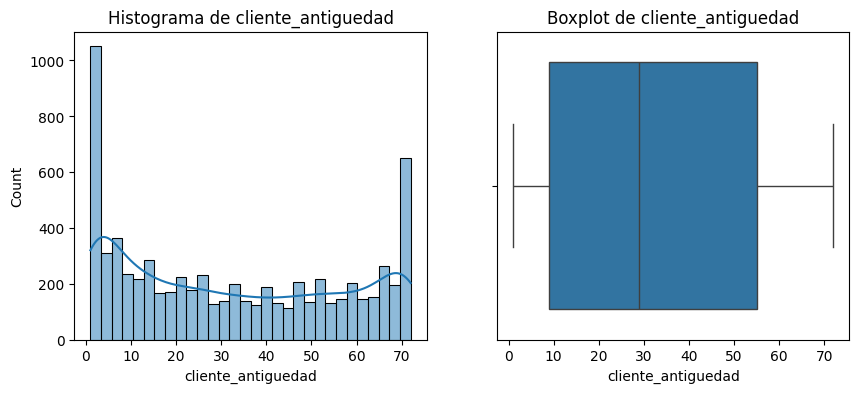


--- cuenta_cargos_mensuales ---
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: cuenta_cargos_mensuales, dtype: float64
Valores nulos: 0


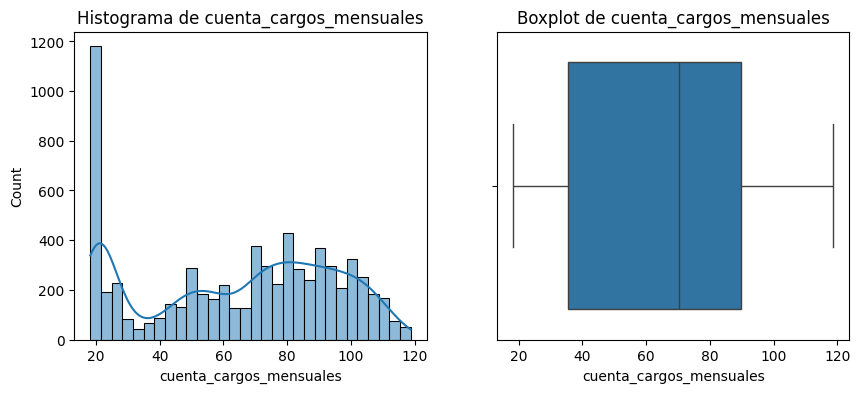


--- cuenta_cargos_totales ---
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: cuenta_cargos_totales, dtype: float64
Valores nulos: 0


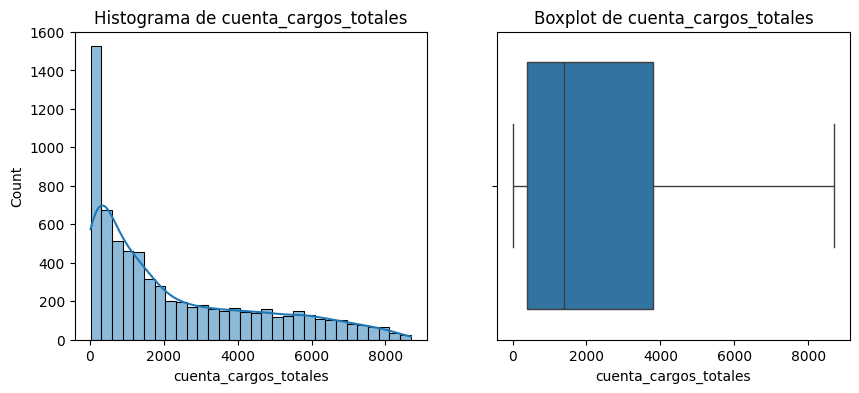


--- Cuentas_Diarias ---
count    7032.000000
mean        2.128719
std         0.988370
min         0.599540
25%         1.169103
50%         2.311104
75%         2.952119
max         3.901117
Name: Cuentas_Diarias, dtype: float64
Valores nulos: 0


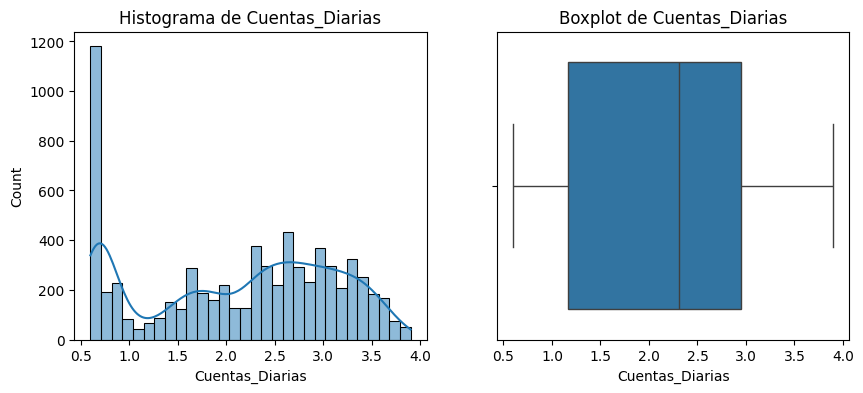

In [71]:
numericas = clientes.select_dtypes(include=['int64', 'float64']).columns

for col in numericas:
    print(f"\n--- {col} ---")
    print(clientes[col].describe())
    print("Valores nulos:", clientes[col].isnull().sum())

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(clientes[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=clientes[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

Observaciones:
- La variable cliente_antiguedad muestra una distribución amplia de antigüedad con valores entre 1 y 72 meses. La media (32.42) es ligeramente mayor que la mediana (29), lo que sugiere una leve asimetría hacia la derecha. La dispersión es alta, indicando que los clientes se distribuyen ampliamente en el tiempo de permanencia.
- La variable cuenta_cargos_mensuales oscila entre 18.25 y 118.75, con una media de 64.80 y una mediana de 70.35. La distribución muestra una ligera asimetría hacia la izquierda. La variabilidad es considerable, esto refleja la existencia de diferentes niveles de cargos mensuales entre los clientes.
- La variable cuenta_cargos_totales presenta una distribución muy dispersa, con un mínimo de 18.80 y un máximo de 8684.80. La media (2283.30) es notablemente superior a la mediana (1397.47), lo cual indica una asimetría positiva. Existen valores considerablemente más altos que la mayoría, que elevan el promedio.
- La variable Cuentas_Diarias muestra valores que van desde 0.60 hasta 3.90, con una media de 2.13. Su distribución replica la forma de los cargos mensuales, con una dispersión moderada.

###**3.1.2- Variables categóricas**


--- cliente_genero ---
cliente_genero
Male      3549
Female    3483
Name: count, dtype: int64
Valores únicos: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Valores nulos: 0


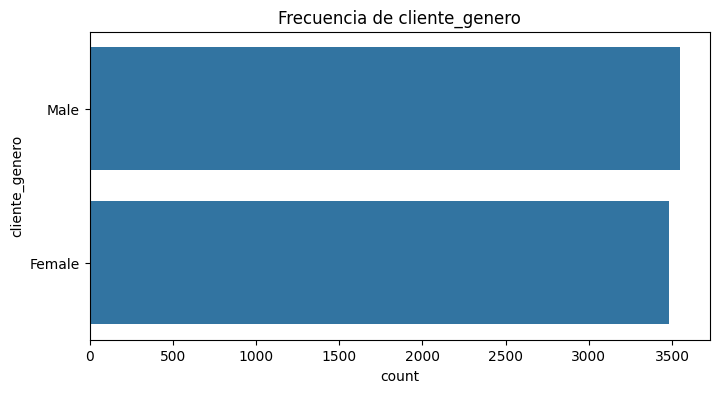


--- telefono_lineas_multiples ---
telefono_lineas_multiples
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
Valores únicos: ['No', 'Yes', 'No phone service']
Categories (3, object): ['No', 'No phone service', 'Yes']
Valores nulos: 0


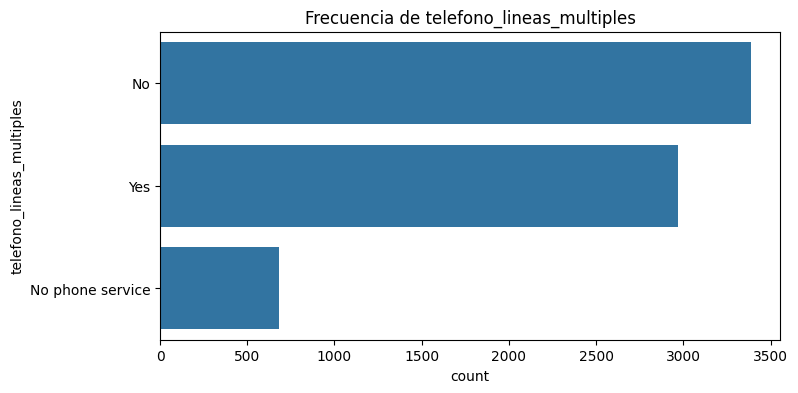


--- internet_servicio ---
internet_servicio
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
Valores únicos: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
Valores nulos: 0


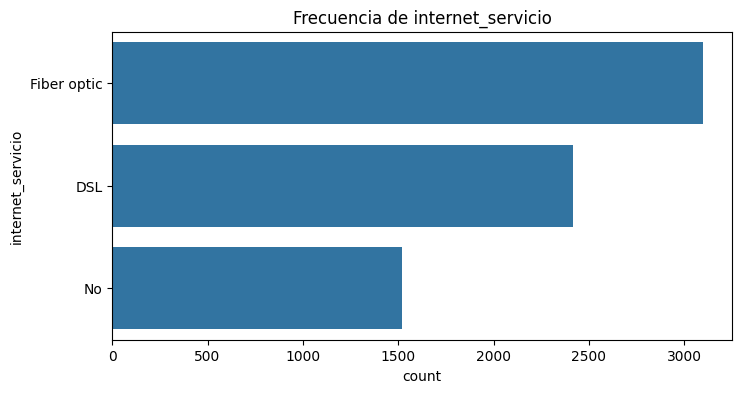


--- internet_seguridad_en_linea ---
internet_seguridad_en_linea
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
Valores únicos: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


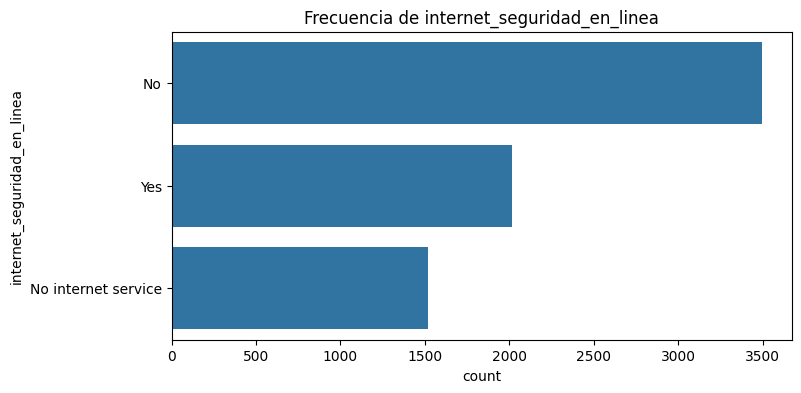


--- internet_respaldo_en_linea ---
internet_respaldo_en_linea
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
Valores únicos: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


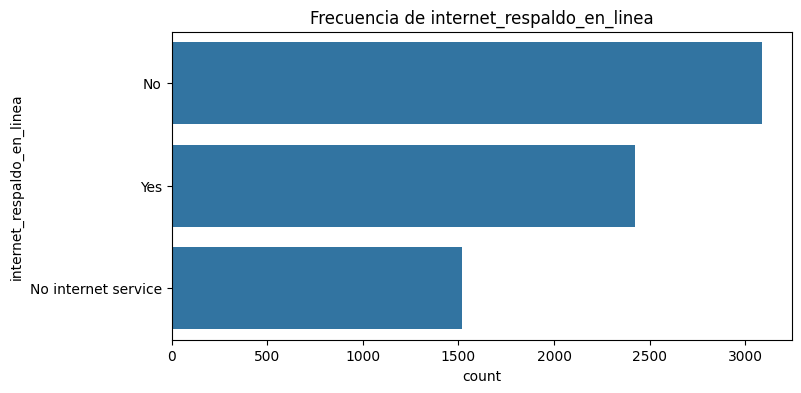


--- internet_proteccion_dispositivo ---
internet_proteccion_dispositivo
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
Valores únicos: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


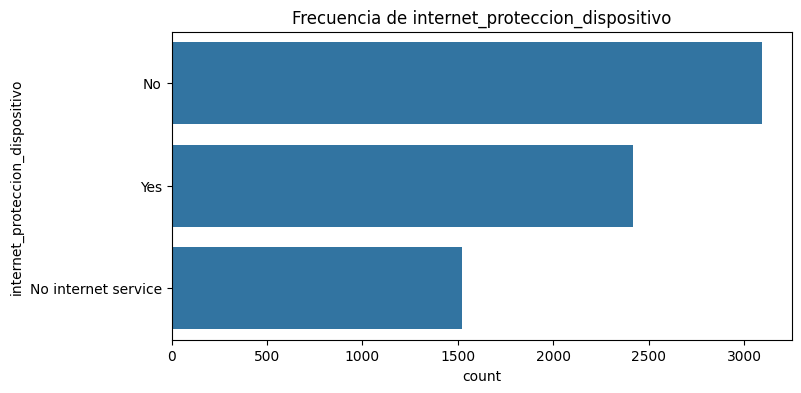


--- internet_soporte_tecnico ---
internet_soporte_tecnico
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64
Valores únicos: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


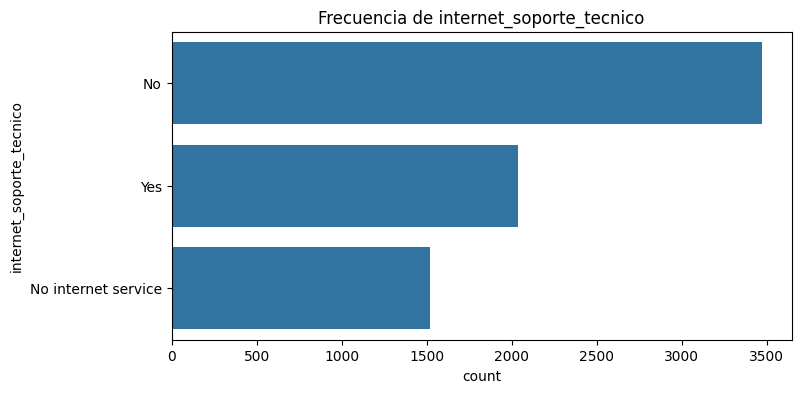


--- internet_streaming_tv ---
internet_streaming_tv
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64
Valores únicos: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


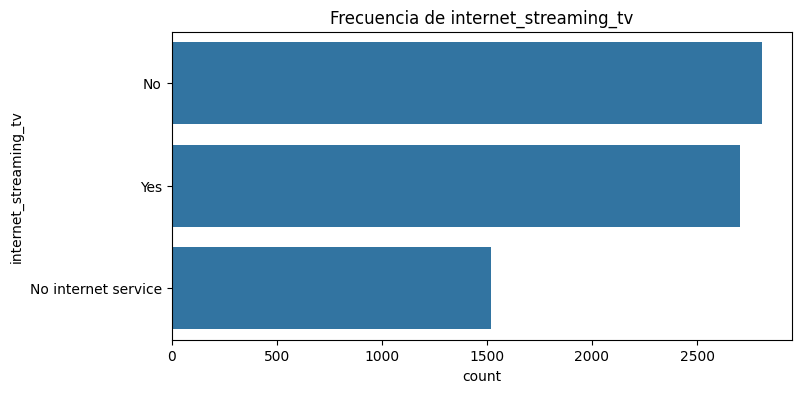


--- internet_streaming_peliculas ---
internet_streaming_peliculas
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64
Valores únicos: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


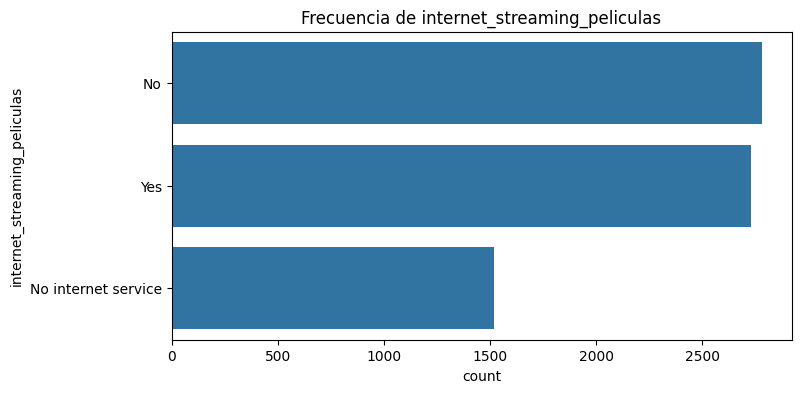


--- cuenta_contrato ---
cuenta_contrato
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
Valores únicos: ['One year', 'Month-to-month', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']
Valores nulos: 0


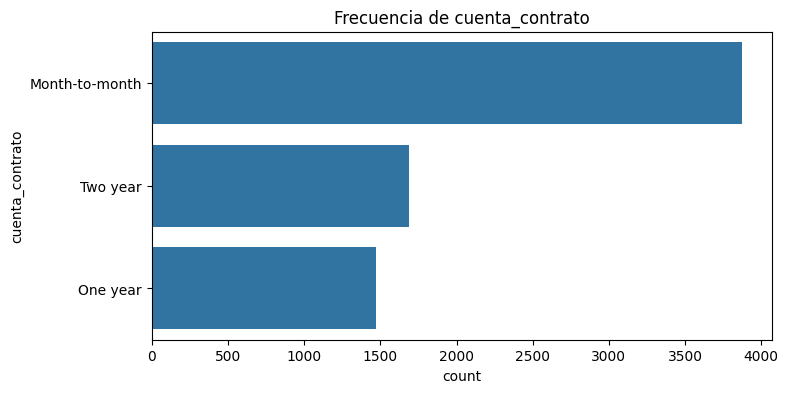


--- cuenta_metodo_pago ---
cuenta_metodo_pago
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64
Valores únicos: ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']
Categories (4, object): ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check',
                         'Mailed check']
Valores nulos: 0


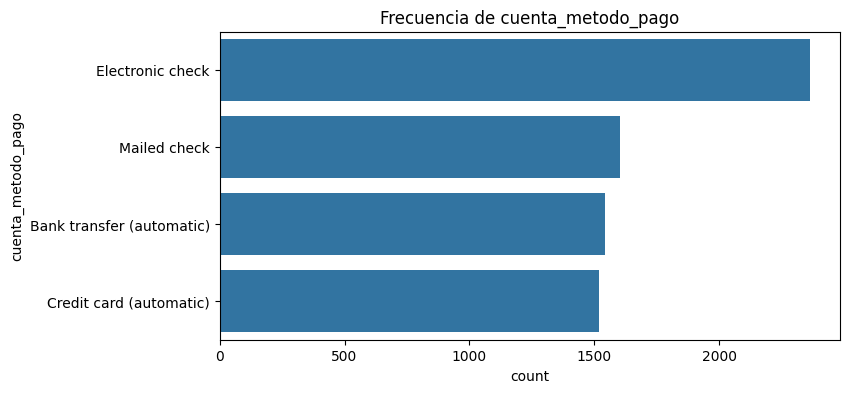

In [72]:
categoricas = clientes.select_dtypes(include=['category']).columns

for col in categoricas:
    print(f"\n--- {col} ---")
    print(clientes[col].value_counts())
    print("Valores únicos:", clientes[col].unique())
    print("Valores nulos:", clientes[col].isnull().sum())

    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=clientes, order=clientes[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.show()

Observaciones:
- cliente_genero: distribución muy equilibrada entre géneros, 50.5% hombres y 49.5% mujeres.
- telefono_lineas_multiples: casi la mitad de los clientes tienen múltiples líneas (42.2%), mientras que un 48.1% no las tiene. Un 9.7% no cuenta con servicio telefónico, lo que indica una fracción menor sin este tipo de servicio.
- internet_servicio: la mayoría de los clientes tiene acceso a Internet (78.4%), principalmente mediante fibra óptica (44%) o DSL (34.4%), mientras que el 21.6% no posee servicio de Internet.
- internet_seguridad_en_linea: entre quienes tienen Internet, la mayoría no tiene este servicio (aproximadamente 63.4%).
- internet_respaldo_en_linea: de los clientes con Internet, una mayoría no utiliza servicios de respaldo en línea.
- internet_proteccion_dispositivo: la mayoría de los clientes con acceso a Internet no cuentan con protección de dispositivos.
- internet_soporte_tecnico: la proporción de clientes sin soporte técnico es mayoritaria entre quienes tienen servicio de Internet.
internet_streaming_tv: entre los clientes con Internet, el uso del servicio de streaming de TV está casi equilibrado, una ligera mayoría no lo utiliza, pero hay una proporción considerable que sí lo hace.
- internet_streaming_peliculas: esta variable refleja una distribución muy similar a la de streaming de TV, con casi la mitad de los clientes con Internet accediendo a este servicio.
- cuenta_contrato: la mayoría de los contratos son mensuales (55.1%), lo que puede indicar baja fidelización. Contratos de uno y dos años suman el 44.9%, mostrando una base relevante de clientes más comprometidos.
- cuenta_metodo_pago: el método más común es el cheque electrónico (33.6%), seguido del cheque por correo (22.8%). Los métodos automáticos (transferencia bancaria y tarjeta de crédito) representan aproximadamente el 43.6%, lo cual sugiere una división en las preferencias entre pagos manuales y automáticos.

###**3.1.2- Variables binarias (incluyendo cancelado o evasión)**


--- cancelado ---
cancelado
False    5163
True     1869
Name: count, dtype: int64


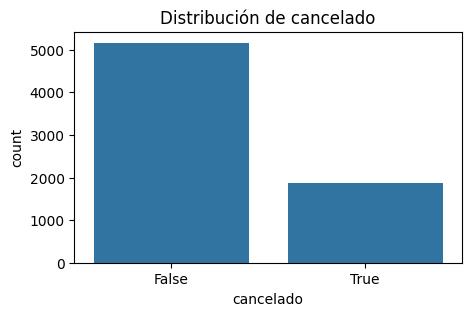


--- cliente_mayor ---
cliente_mayor
False    5890
True     1142
Name: count, dtype: int64


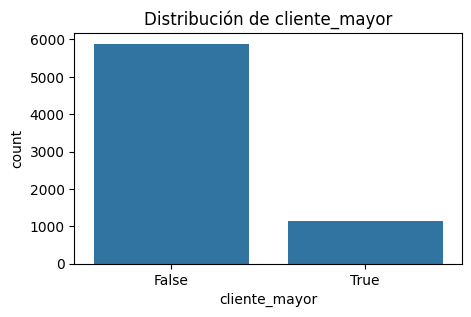


--- cliente_con_pareja ---
cliente_con_pareja
False    3639
True     3393
Name: count, dtype: int64


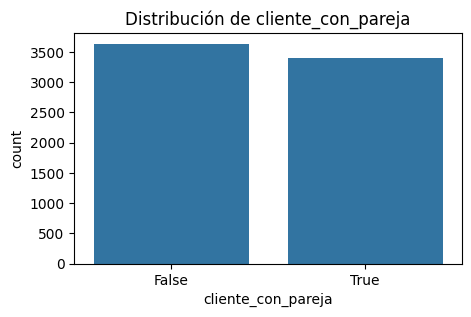


--- cliente_con_dependientes ---
cliente_con_dependientes
False    4933
True     2099
Name: count, dtype: int64


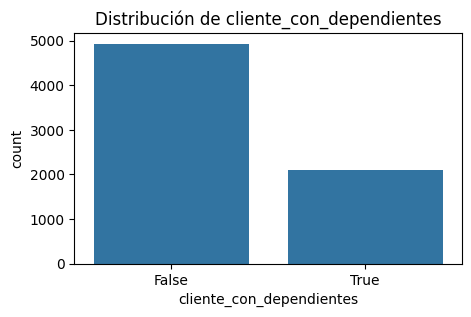


--- telefono_servicio ---
telefono_servicio
True     6352
False     680
Name: count, dtype: int64


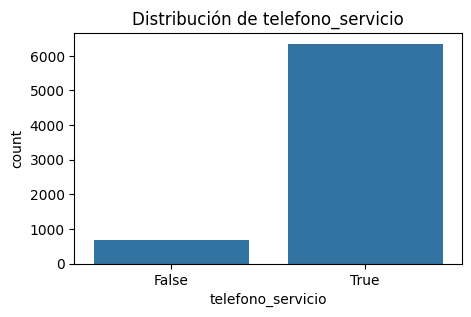


--- cuenta_facturacion_digital ---
cuenta_facturacion_digital
True     4168
False    2864
Name: count, dtype: int64


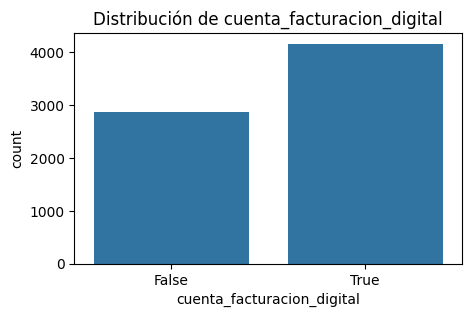

In [73]:
booleanas = clientes.select_dtypes(include='bool').columns

for col in booleanas:
    print(f"\n--- {col} ---")
    print(clientes[col].value_counts(dropna=False))

    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=clientes)
    plt.title(f'Distribución de {col}')
    plt.show()

Observaciones:

- cancelado: aproximadamente una cuarta parte de los clientes (26.5%) han cancelado el servicio. Este dato puede ser clave como variable objetivo en un análisis de abandono o churn.
- cliente_mayor (65 años o más): la mayoría de los clientes son menores de 65 años (83.7%). Esto puede influir en el tipo de servicios contratados o en la retención.
- cliente_con_pareja: casi está perfectamente balanceada.
- cliente_con_dependientes: una gran mayoría de los clientes no tiene dependientes (70.2%).
- telefono_servicio: a mayoría de los clientes cuenta con servicio telefónico (90.3%).
- cuenta_facturacion_digital: más de la mitad de los clientes utilizan facturación digital (59.3%).

##**3.2- Análisis bivariado**

###**3.2.1- Variables numéricas**


--- cliente_antiguedad ---


,count,mean,std,min,25%,50%,75%,max
cancelado,,,,,,,,
False,5163.0,37.65,24.08,1.0,15.0,38.0,61.0,72.0
True,1869.0,17.98,19.53,1.0,2.0,10.0,29.0,72.0


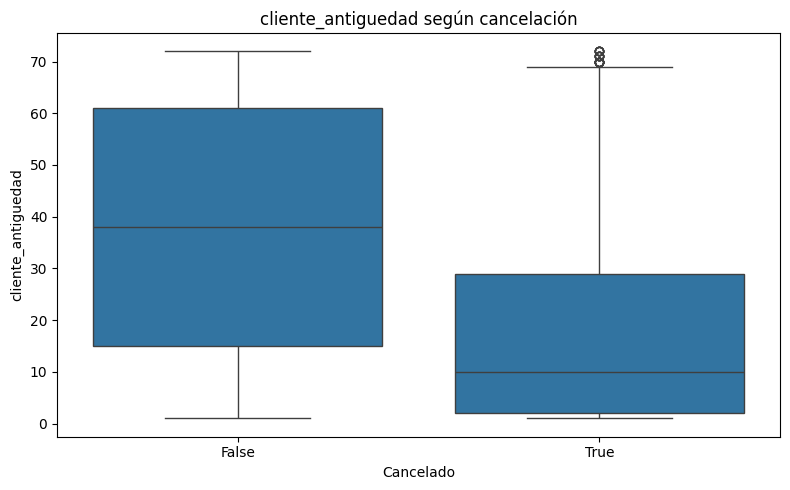


--- cuenta_cargos_mensuales ---


,count,mean,std,min,25%,50%,75%,max
cancelado,,,,,,,,
False,5163.0,61.31,31.09,18.25,25.10,64.45,88.48,118.75
True,1869.0,74.44,24.67,18.85,56.15,79.65,94.20,118.35


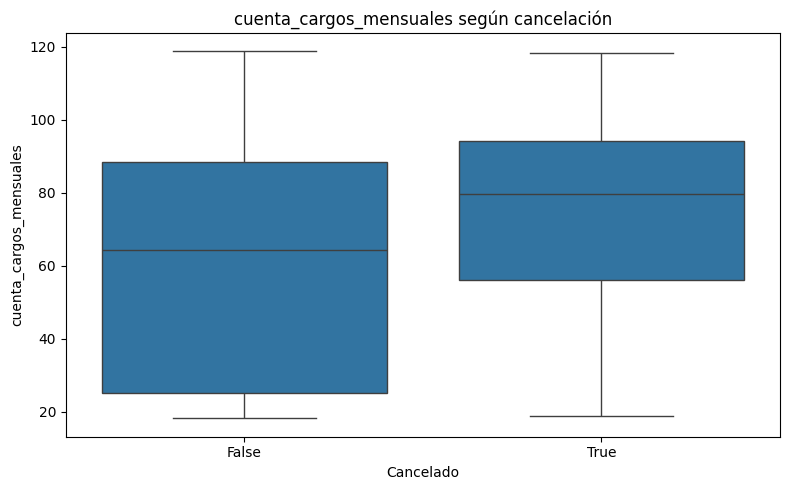


--- cuenta_cargos_totales ---


,count,mean,std,min,25%,50%,75%,max
cancelado,,,,,,,,
False,5163.0,2555.34,2329.46,18.80,577.83,1683.60,4264.12,8672.45
True,1869.0,1531.80,1890.82,18.85,134.50,703.55,2331.30,8684.80


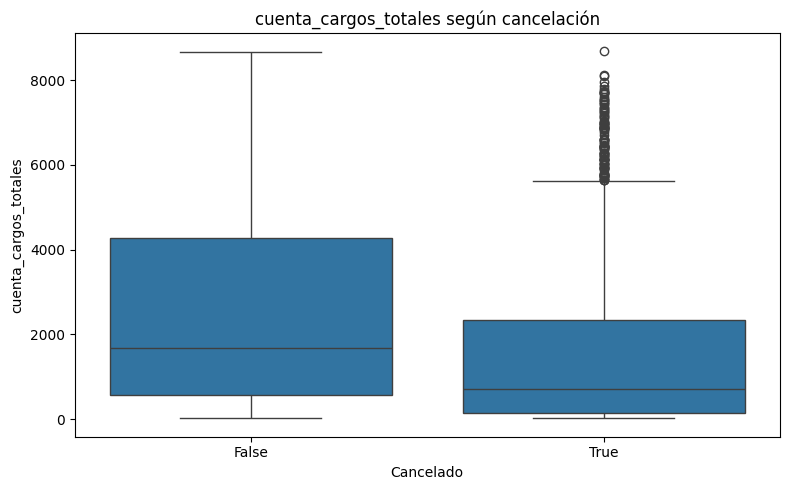


--- Cuentas_Diarias ---


,count,mean,std,min,25%,50%,75%,max
cancelado,,,,,,,,
False,5163.0,2.01,1.02,0.60,0.82,2.12,2.91,3.90
True,1869.0,2.45,0.81,0.62,1.84,2.62,3.09,3.89


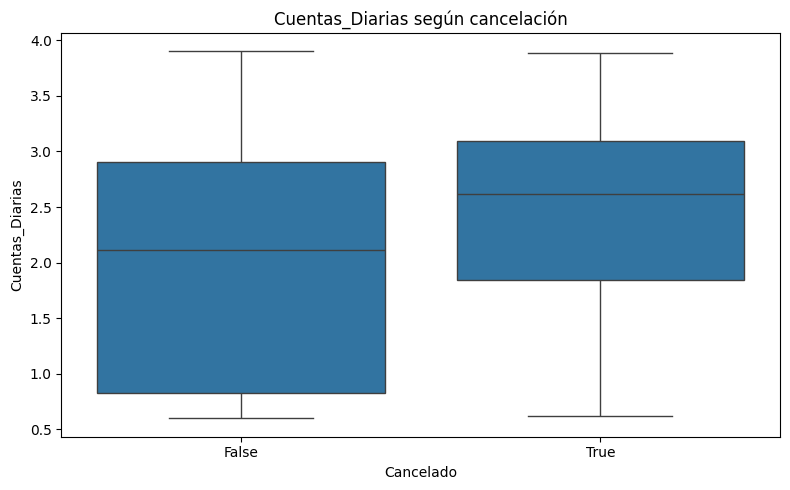

In [74]:
variables_numericas = ['cliente_antiguedad', 'cuenta_cargos_mensuales', 'cuenta_cargos_totales', 'Cuentas_Diarias']

for var in variables_numericas:
    print(f"\n--- {var} ---")

    # Tabla resumen por grupo de cancelación
    resumen = clientes.groupby('cancelado')[var].describe().round(2)
    display(resumen)

    # Gráfico: solo boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='cancelado', y=var, data=clientes)
    plt.title(f'{var} según cancelación')
    plt.xlabel('Cancelado')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

Observaciones:

- cliente_antiguedad (meses como cliente): los clientes que no cancelaron tienen una media de 37.65 meses como clientes, mientras que los que cancelaro 17.98 meses, mostrando que quienes cancelan tienden a ser clientes más recientes. Los percentiles también refuerzan esto: el 75% de los clientes que cancelaron tienen menos de 29 meses de antigüedad, frente a 61 meses en los que no cancelaron. La diferencia en la distribución general es clara: los clientes que permanecen más tiempo tienen menor propensión a cancelar.
- cuenta_cargos_mensuales (cargo mensual promedio): los clientes que cancelaron tienen una media más alta (74.44) que los que no cancelaron (61.31). La mediana también refleja esta diferencia (79.65 vs. 64.45), lo cual indica que quienes pagan más mensualmente tienen mayor tasa de cancelación.
- cuenta_cargos_totales (total acumulado de cargos): los clientes que no cancelaron tienen un total promedio mucho mayor (2555.34) que los cancelados (1531.80). Esto es lógico: los clientes con mayor antigüedad han acumulado más cargos, mientras que quienes cancelan tienden a tener una historia de uso más corta. Este patrón refleja que los clientes más antiguos no solo permanecen más, sino que también han aportado más ingresos.
- Cuentas_Diarias (uso promedio diario del servicio): los clientes que cancelaron tienen un mayor promedio diario (2.45) que los que no cancelaron (2.01). Esto sugiere que, en promedio, los clientes que cancelan usan más el servicio por día mientras están activos.

Resumen general:
- Los clientes que cancelan tienden a:
  - Tener menos antigüedad.
  - Pagar más por mes.
  - Haber gastado menos en total (lógico, por menor permanencia).
  - Tener un uso diario ligeramente más alto.

###**3.2.2- Variables categóricas (incluyendo booleanas)**


--- cliente_genero ---


cancelado,False,True
cliente_genero,,
Female,2544,939
Male,2619,930



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
cliente_genero,,
Female,73.04,26.96
Male,73.80,26.20


<Figure size 600x400 with 0 Axes>

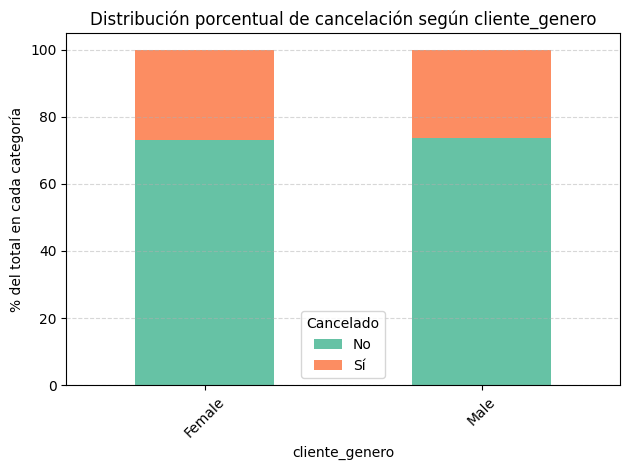


--- telefono_lineas_multiples ---


cancelado,False,True
telefono_lineas_multiples,,
No,2536,849
No phone service,510,170
Yes,2117,850



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
telefono_lineas_multiples,,
No,74.92,25.08
No phone service,75.00,25.00
Yes,71.35,28.65


<Figure size 600x400 with 0 Axes>

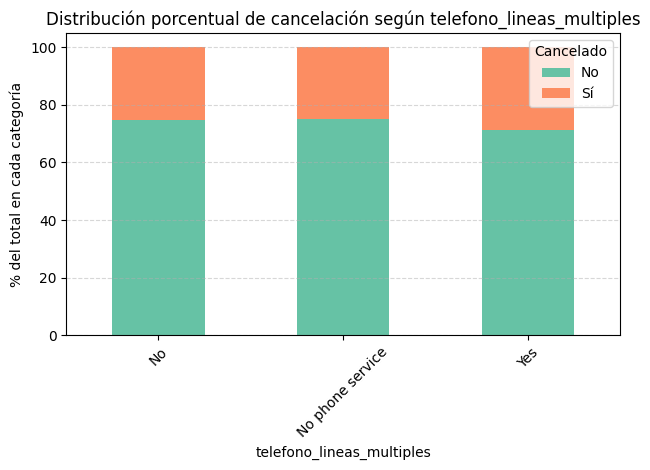


--- internet_servicio ---


cancelado,False,True
internet_servicio,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
internet_servicio,,
DSL,81.00,19.00
Fiber optic,58.11,41.89
No,92.57,7.43


<Figure size 600x400 with 0 Axes>

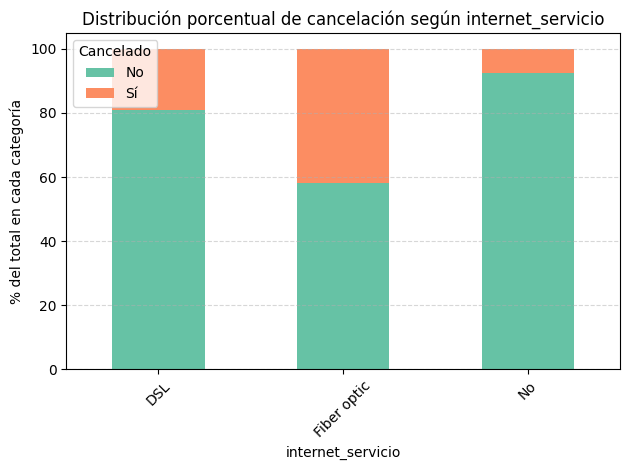


--- internet_seguridad_en_linea ---


cancelado,False,True
internet_seguridad_en_linea,,
No,2036,1461
No internet service,1407,113
Yes,1720,295



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
internet_seguridad_en_linea,,
No,58.22,41.78
No internet service,92.57,7.43
Yes,85.36,14.64


<Figure size 600x400 with 0 Axes>

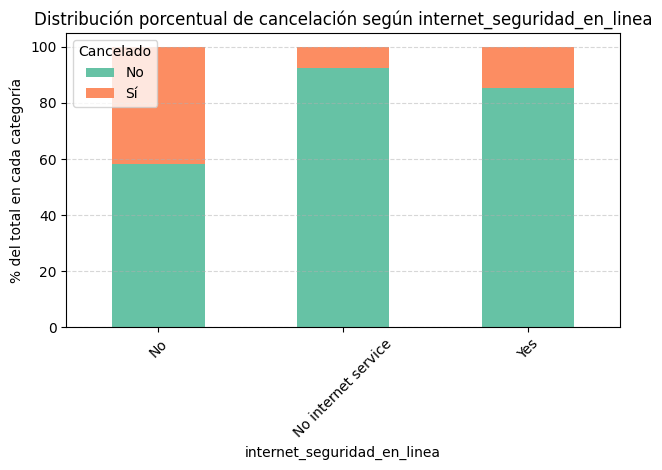


--- internet_respaldo_en_linea ---


cancelado,False,True
internet_respaldo_en_linea,,
No,1854,1233
No internet service,1407,113
Yes,1902,523



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
internet_respaldo_en_linea,,
No,60.06,39.94
No internet service,92.57,7.43
Yes,78.43,21.57


<Figure size 600x400 with 0 Axes>

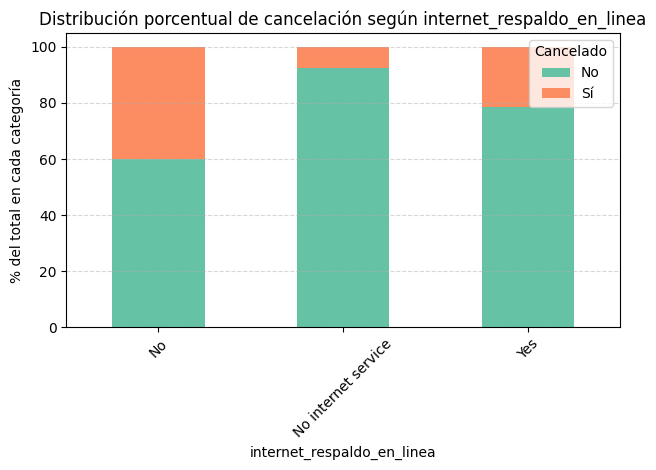


--- internet_proteccion_dispositivo ---


cancelado,False,True
internet_proteccion_dispositivo,,
No,1883,1211
No internet service,1407,113
Yes,1873,545



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
internet_proteccion_dispositivo,,
No,60.86,39.14
No internet service,92.57,7.43
Yes,77.46,22.54


<Figure size 600x400 with 0 Axes>

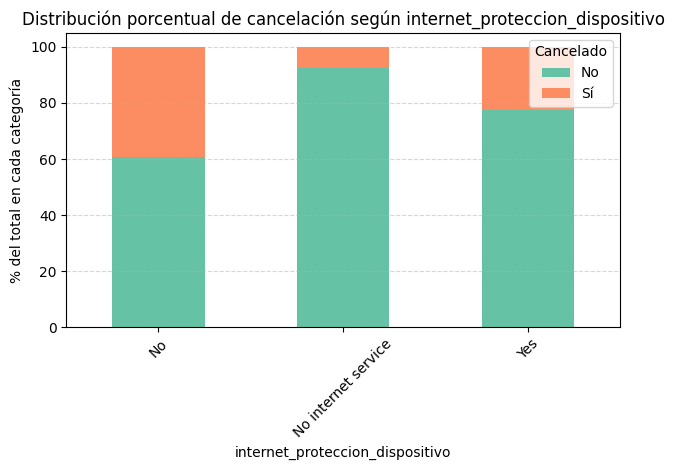


--- internet_soporte_tecnico ---


cancelado,False,True
internet_soporte_tecnico,,
No,2026,1446
No internet service,1407,113
Yes,1730,310



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
internet_soporte_tecnico,,
No,58.35,41.65
No internet service,92.57,7.43
Yes,84.80,15.20


<Figure size 600x400 with 0 Axes>

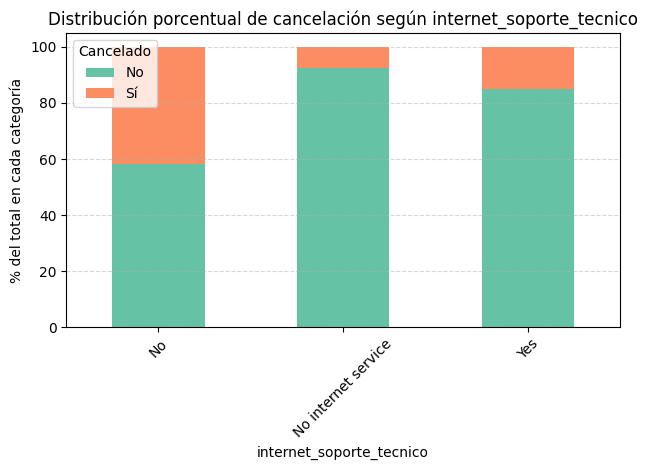


--- internet_streaming_tv ---


cancelado,False,True
internet_streaming_tv,,
No,1867,942
No internet service,1407,113
Yes,1889,814



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
internet_streaming_tv,,
No,66.46,33.54
No internet service,92.57,7.43
Yes,69.89,30.11


<Figure size 600x400 with 0 Axes>

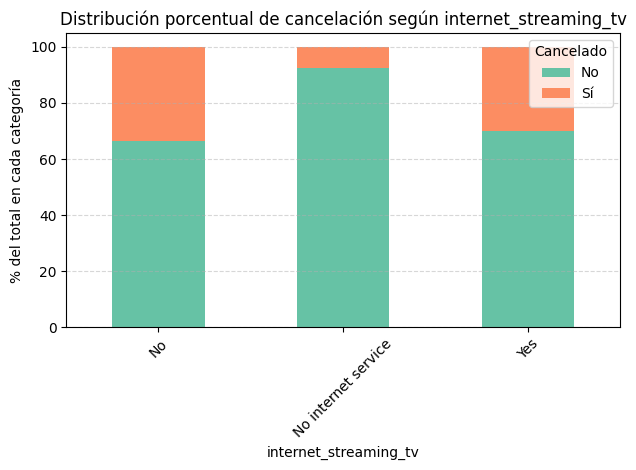


--- internet_streaming_peliculas ---


cancelado,False,True
internet_streaming_peliculas,,
No,1843,938
No internet service,1407,113
Yes,1913,818



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
internet_streaming_peliculas,,
No,66.27,33.73
No internet service,92.57,7.43
Yes,70.05,29.95


<Figure size 600x400 with 0 Axes>

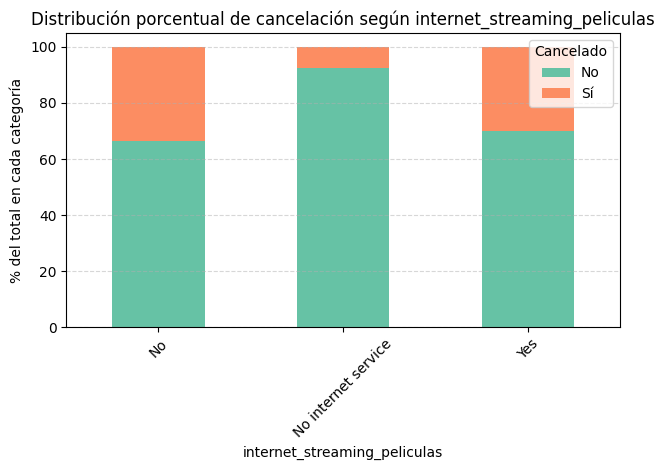


--- cuenta_contrato ---


cancelado,False,True
cuenta_contrato,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
cuenta_contrato,,
Month-to-month,57.29,42.71
One year,88.72,11.28
Two year,97.15,2.85


<Figure size 600x400 with 0 Axes>

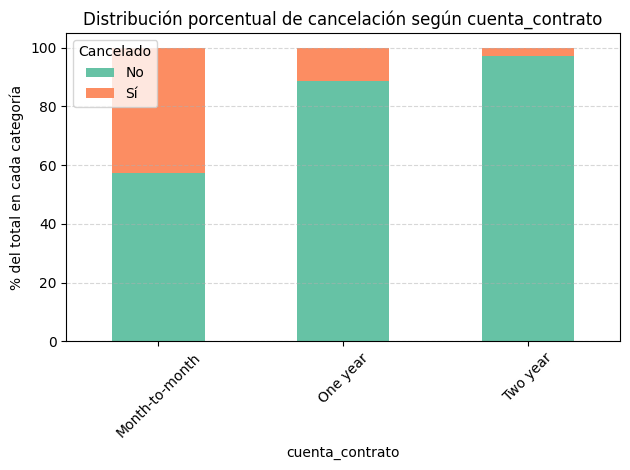


--- cuenta_metodo_pago ---


cancelado,False,True
cuenta_metodo_pago,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
cuenta_metodo_pago,,
Bank transfer (automatic),83.27,16.73
Credit card (automatic),84.75,15.25
Electronic check,54.71,45.29
Mailed check,80.80,19.20


<Figure size 600x400 with 0 Axes>

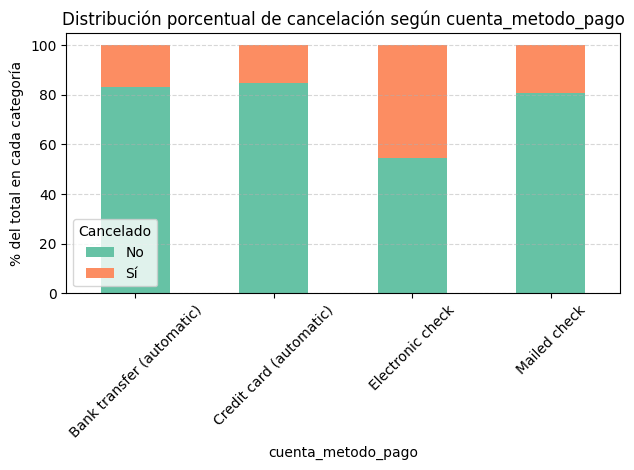


--- cliente_mayor ---


cancelado,False,True
cliente_mayor,,
False,4497,1393
True,666,476



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
cliente_mayor,,
False,76.35,23.65
True,58.32,41.68


<Figure size 600x400 with 0 Axes>

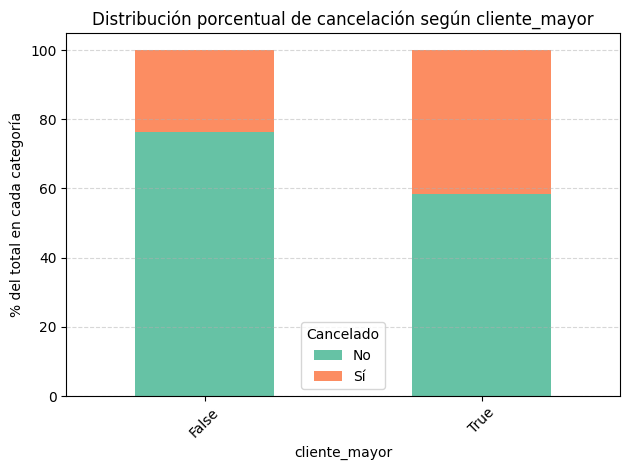


--- cliente_con_pareja ---


cancelado,False,True
cliente_con_pareja,,
False,2439,1200
True,2724,669



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
cliente_con_pareja,,
False,67.02,32.98
True,80.28,19.72


<Figure size 600x400 with 0 Axes>

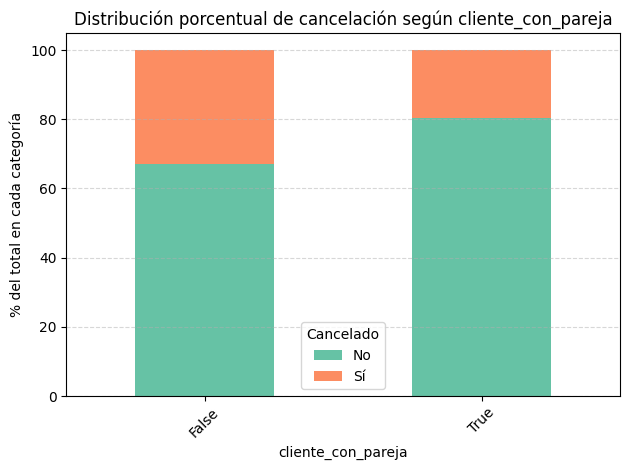


--- cliente_con_dependientes ---


cancelado,False,True
cliente_con_dependientes,,
False,3390,1543
True,1773,326



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
cliente_con_dependientes,,
False,68.72,31.28
True,84.47,15.53


<Figure size 600x400 with 0 Axes>

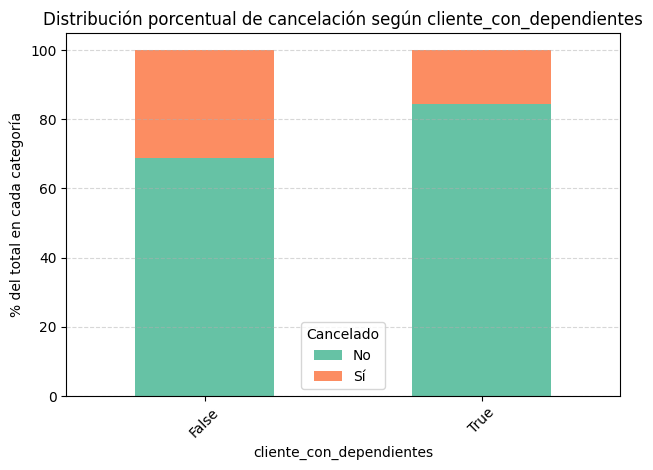


--- telefono_servicio ---


cancelado,False,True
telefono_servicio,,
False,510,170
True,4653,1699



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
telefono_servicio,,
False,75.00,25.00
True,73.25,26.75


<Figure size 600x400 with 0 Axes>

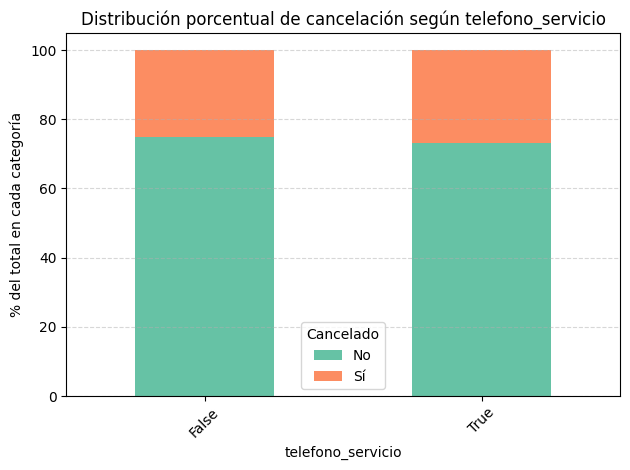


--- cuenta_facturacion_digital ---


cancelado,False,True
cuenta_facturacion_digital,,
False,2395,469
True,2768,1400



Distribución porcentual (% dentro de cada categoría):


cancelado,False,True
cuenta_facturacion_digital,,
False,83.62,16.38
True,66.41,33.59


<Figure size 600x400 with 0 Axes>

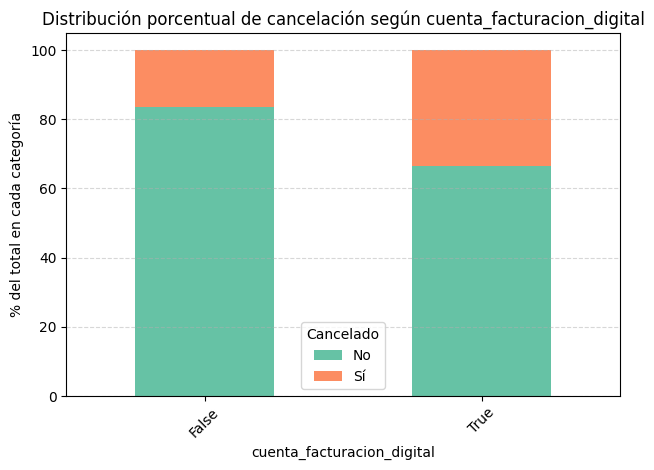

In [75]:
variables_categoricas = [
    'cliente_genero', 'telefono_lineas_multiples', 'internet_servicio',
    'internet_seguridad_en_linea', 'internet_respaldo_en_linea',
    'internet_proteccion_dispositivo', 'internet_soporte_tecnico',
    'internet_streaming_tv', 'internet_streaming_peliculas',
    'cuenta_contrato', 'cuenta_metodo_pago',
    'cliente_mayor', 'cliente_con_pareja', 'cliente_con_dependientes',
    'telefono_servicio', 'cuenta_facturacion_digital'
]

for var in variables_categoricas:
    print(f"\n--- {var} ---")

    # Tabla cruzada
    tabla = pd.crosstab(clientes[var], clientes["cancelado"])
    tabla_prop = pd.crosstab(clientes[var], clientes["cancelado"], normalize='index') * 100

    display(tabla)
    print("\nDistribución porcentual (% dentro de cada categoría):")
    display(tabla_prop.round(2))

    # Gráfico de barras apiladas proporcionales
    plt.figure(figsize=(6, 4))
    tabla_prop.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'])
    plt.title(f'Distribución porcentual de cancelación según {var}')
    plt.ylabel('% del total en cada categoría')
    plt.xlabel(var)
    plt.legend(title='Cancelado', labels=['No', 'Sí'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

Observaciones:

- cliente_genero (género del cliente): la proporción de cancelación es prácticamente igual entre géneros, por lo que el género del cliente no parece ser un factor determinante en la cancelación del servicio:
  - Mujeres: 26.96%
  - Hombres: 26.20%
- telefono_lineas_multiples (líneas múltiples contratadas): Los clientes con líneas múltiples tienen una tasa de cancelación del 28.65%, ligeramente más alta que los que no tienen (25.08%). Los que no tienen servicio telefónico tienen una tasa intermedia (25.00%).

  Esto sugiere que tener varias líneas podría estar relacionado con mayor tasa de cancelación, aunque las diferencias son sutiles.
- internet_servicio (tipo de servicio de internet):
  - Fibra óptica: 41.89%.
  - DSL: 19.00%.
  - Sin servicio de internet: 7.43%.

  El servicio de fibra óptica tiene la tasa de cancelación más alta con diferencia.
- internet_seguridad_en_linea (servicio de seguridad en línea):
  - Sin seguridad en línea: 41.78% cancelaron
  - Con seguridad en línea: 14.64%
  - Sin internet: 7.43%

  No contar con servicios adicionales como seguridad en línea parece asociado a mayor probabilidad de cancelación.
- internet_respaldo_en_linea (respaldo en la nube):
  - Sin respaldo: 39.94%
  - Con respaldo: 21.57%
  - Sin internet: 7.43%

  El respaldo en línea también muestra menor tasa de cancelación, apoyando la idea de que los servicios adicionales mejoran la retención
- internet_proteccion_dispositivo (protección de dispositivos):
  - Sin protección: 39.14% cancelaron
  - Con protección: 22.54%
  - Sin internet: 7.43%

  Una vez más, contar con servicios extra reduce la probabilidad de cancelación.
- internet_soporte_tecnico (soporte técnico contratado):
  - Sin soporte: 41.65% cancelaron
  - Con soporte: 15.20%
  - Sin internet: 7.43%

  La diferencia es notable. El soporte técnico parece estar fuertemente vinculado a la retención del cliente.
- internet_streaming_tv (servicio de TV por streaming):
  - Sin servicio: 33.54% cancelaron
  - Con servicio: 30.11%
  - Sin internet: 7.43%

  Tener este servicio adicional también parece reducir ligeramente la tasa de cancelación.
- internet_streaming_peliculas (streaming de películas)
  - Sin servicio: 33.73%
  - Con servicio: 29.95%
  - Sin internet: 7.43%

  Los clientes con este tipo de contenido tienden a cancelar un poco menos, similar al patrón anterior.
- cuenta_contrato (tipo de contrato):
  - Mes a mes: 42.71% cancelaron
  - 1 año: 11.28%
  - 2 años: 2.85%

  Este es uno de los factores más claramente asociados a la cancelación:
  contratos a largo plazo tienen menor tasa de cancelación.
- cuenta_metodo_pago (método de pago):
  - Electronic check: 45.29% cancelaron
  - Bank transfer / Credit card (automáticos): 16–17%
   -Cheque por correo: 19.20%

  Los pagos automáticos están fuertemente asociados con baja cancelación, mientras que quienes pagan con cheque electrónico cancelan mucho más.
- cliente_mayor (edad mayor):
  - Mayores: 41.68% cancelaron
  - No mayores: 23.65%

  Los clientes mayores tienen una tasa de cancelación más alta.
- cliente_con_pareja:
  - Con pareja: 19.72% cancelaron
  - Sin pareja: 32.98%

  Tener pareja parece reducir la probabilidad de cancelar.
- cliente_con_dependientes:
  - Con dependientes: 15.53% cancelaron
  - Sin dependientes: 31.28%

  Tener personas a cargo se asocia con menor cancelación.
- telefono_servicio:
  - Con servicio: 26.75%
  - Sin servicio: 25.00%

  Diferencia poco significativa. El servicio telefónico no parece tener una relación clara con la cancelación.
- cuenta_facturacion_digital:
  - Con facturación digital: 33.59%
  - Sin facturación digital: 16.38%

  Los usuarios con facturación digital tienen una tasa de cancelación mucho mayor.

Resumen general:
  - Los clientes con servicios adicionales (seguridad, respaldo, soporte, streaming) y contratos largos o pagos automáticos son menos propensos a cancelar.
  - Los clientes con fibra óptica, sin servicios extra, sin pareja o con pagos electrónicos presentan tasas de cancelación más altas.

#📄**4- Informe final**

##**4.1- Introducción**
El presente informe tiene como objetivo analizar el comportamiento de los clientes de TelecomX LATAM con relación a la evasión del servicio (churn). A partir de un conjunto de datos históricos de clientes, se busca identificar patrones y características que distingan a los usuarios que cancelan el servicio de aquellos que lo mantienen. Comprender estos factores permitirá tomar decisiones estratégicas orientadas a reducir la tasa de cancelación y mejorar la retención.

##**4.2- Limpieza y Tratamiento de Datos**
Se realizó una limpieza y tratamiento inicial de los datos que incluyó:
- Conversión de variables categóricas y booleanas para facilitar el análisis.
- Revisión de valores nulos o inconsistentes.
- Transformación de columnas para un mejor manejo analítico, como la creación de la variable Cuentas_Diarias a partir del total gastado y la antigüedad del cliente.
- Normalización y renombramiento de columnas para mejorar la legibilidad del análisis.

Estas acciones aseguraron que los datos estén listos para su análisis exploratorio y visualización.

##**4.3- Análisis Exploratorio**

###**4.3.1- Análisis Univariado**
Se analizaron variables como:
- cancelado: aproximadamente el 26.6% de los clientes cancelaron el servicio.
- cliente_mayor: sólo el 16.2% de los clientes son adultos mayores.
- cliente_con_pareja y cliente_con_dependientes: distribuidos de manera más balanceada, lo que indica diversidad de perfiles familiares.
- telefono_servicio y cuenta_facturacion_digital: más del 90% tiene teléfono y alrededor del 59% usa facturación digital.

Estas variables ayudan a perfilar al cliente promedio, pero por sí solas no explican el churn.

###**4.3.2- Análisis Bivariado**
Se compararon distintas variables numéricas entre clientes que cancelaron y los que no:
- cliente_antiguedad (meses como cliente):
  -Cancelados: media de 17.98 meses.
  -No cancelados: media de 37.65 meses.

Los clientes más antiguos tienden a permanecer, mientras que los nuevos cancelan con mayor frecuencia.

- cuenta_cargos_mensuales:
  - Cancelados: media de 74.44.
  - No cancelados: media de 61.31.

  Clientes con cargos mensuales más altos presentan mayor tasa de cancelación.
- cuenta_cargos_totales:
  - Cancelados: 1531.80 en promedio.
  - No cancelados: 2555.34 en promedio.

  Los clientes cancelados han gastado menos históricamente, probablemente por su menor permanencia.
- Cuentas_Diarias:
  - Cancelados: media de 2.45.
  - No cancelados: media de 2.01.

  Ligeramente mayor uso diario entre quienes cancelan, lo que puede sugerir usuarios intensivos insatisfechos.

También se exploró la relación entre cancelado y variables categóricas y booleanas como:
- tipo_contrato: los clientes con contrato mensual cancelan significativamente más que aquellos con contratos anuales o de más largo plazo.
- metodo_pago: el método de pago electrónico o automático tiene una menor tasa de evasión, en comparación con pagos manuales.
- servicios (como internet, seguridad en línea, respaldo en la nube): la presencia o ausencia de ciertos servicios se asocia con diferentes tasas de cancelación, lo que puede reflejar el valor percibido.

**Conclusiones e insights del análisis:**
- Antigüedad es un factor crítico: los clientes nuevos cancelan con más frecuencia. La retención temprana es clave.
- Costo mensual influye: a mayor cargo mensual, mayor probabilidad de cancelación.
- Usuarios intensivos cancelan más: clientes que usan más el servicio diariamente podrían estar insatisfechos o con expectativas no cubiertas.
- Tipo de contrato es determinante: los contratos mensuales concentran la mayor parte de las cancelaciones.
- El método de pago importa: los pagos automáticos o digitales están asociados a menor evasión.

##**4.4- Recomendaciones**
A partir de los resultados del análisis, se sugieren las siguientes acciones estratégicas:
- Programas de retención temprana: ofrecer beneficios o seguimiento especial durante los primeros meses del cliente.
- Revisión de estructura de precios: evaluar si los planes con altos cargos mensuales están alineados con el valor percibido.
- Análisis de satisfacción en usuarios intensivos: indagar si su mayor uso implica necesidades no satisfechas o frustración.
- Fomentar contratos a largo plazo: ofrecer incentivos para migrar de contratos mensuales a anuales.
- Promover el uso de pagos automáticos: facilitar y bonificar a quienes opten por métodos de pago digitales.

#**5- Extra: Análisis de Correlación**

In [84]:
clientes

,id_cliente,cancelado,cliente_genero,cliente_mayor,cliente_con_pareja,cliente_con_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_multiples,internet_servicio,...,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_streaming_tv,internet_streaming_peliculas,cuenta_contrato,cuenta_facturacion_digital,cuenta_metodo_pago,cuenta_cargos_mensuales,cuenta_cargos_totales,Cuentas_Diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.155059
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.90,542.40,1.967806
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.427727
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85,3.219448
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.756242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,False,False,False,13,True,No,DSL,...,No,Yes,No,No,One year,False,Mailed check,55.15,742.90,1.811761
7263,9992-RRAMN,True,Male,False,True,False,22,True,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,True,Electronic check,85.10,1873.70,2.795664
7264,9992-UJOEL,False,Male,False,False,False,2,True,No,DSL,...,No,No,No,No,Month-to-month,True,Mailed check,50.30,92.75,1.652431
7265,9993-LHIEB,False,Male,False,True,True,67,True,No,DSL,...,Yes,Yes,No,Yes,Two year,False,Mailed check,67.85,4627.65,2.228975


In [86]:
columnas_servicios = [
    'telefono_lineas_multiples',
    'internet_seguridad_en_linea',
    'internet_respaldo_en_linea',
    'internet_proteccion_dispositivo',
    'internet_soporte_tecnico',
    'internet_streaming_tv',
    'internet_streaming_peliculas'
]
clientes['cantidad_servicios'] = clientes[columnas_servicios].apply(lambda x: sum(x == 'Yes'), axis=1)

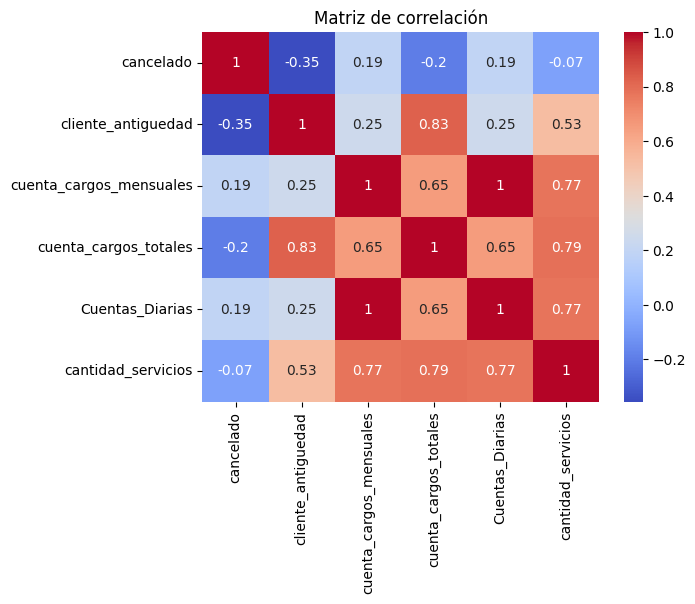

In [87]:
corr = clientes[['cancelado', 'cliente_antiguedad', 'cuenta_cargos_mensuales', 'cuenta_cargos_totales', 'Cuentas_Diarias', 'cantidad_servicios']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()